In [2]:
import os
import pandas as pd
import numpy as np

In [59]:
os.listdir('Tips')

['ALEP.csv',
 'AMZN.csv',
 'BABA.csv',
 'ETSY.csv',
 'HD.csv',
 'JD.csv',
 'OZONDR.csv',
 'Rakuten(4755).csv',
 'TGT.csv',
 'WMT.csv']

In [60]:
files = os.listdir('Tips')
df = pd.DataFrame()
for file in files:
    if 'csv' in file:
        temp = pd.read_csv(f'Tips/{file}')
        temp['Компания'] = file[:-4]
        df = df.append(temp, ignore_index = True)
df

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Компания
0,01.11.2022,"24,66","23,26","26,94","22,62",NaN,"6,29%",ALEP
1,01.10.2022,"23,20","21,50","23,27","17,90",NaN,"7,66%",ALEP
2,01.09.2022,"21,55","24,50","27,00","20,75",NaN,"-13,10%",ALEP
3,01.08.2022,"24,80","25,09","29,92","23,72",NaN,"-0,96%",ALEP
4,01.07.2022,"25,04","23,66","28,12","21,87",NaN,"5,03%",ALEP
...,...,...,...,...,...,...,...,...
125,01.03.2022,"148,92","136,00","150,54","135,03","9,04M","10,18%",WMT
126,01.02.2022,"135,16","139,21","141,99","132,01","162,40M","-3,33%",WMT
127,01.01.2022,"139,81","144,00","146,63","133,95","165,59M","-3,37%",WMT
128,01.12.2021,"144,69","140,51","146,53","135,24","238,68M","2,89%",WMT


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Дата      130 non-null    object 
 1   Цена      130 non-null    float64
 2   Откр.     130 non-null    object 
 3   Макс.     130 non-null    object 
 4   Мин.      130 non-null    object 
 5   Объём     117 non-null    object 
 6   Изм. %    130 non-null    object 
 7   Компания  130 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


In [72]:
df_pivot = df.pivot('Дата', "Компания", "Цена")
df_pivot

Компания,ALEP,AMZN,BABA,ETSY,HD,JD,OZONDR,Rakuten(4755),TGT,WMT
Дата,,,,,,,,,,
01.01.2022,37.60,149.57,125.79,157.08,366.98,73.04,1606.5,991.0,220.43,139.81
01.02.2022,31.36,153.56,105.19,154.89,315.83,69.87,1005.5,974.0,199.77,135.16
01.03.2022,35.57,163.00,108.80,124.28,299.33,56.45,1425.0,967.0,212.22,148.92
01.04.2022,23.04,124.28,97.09,93.19,300.40,60.14,1022.0,918.0,228.65,152.99
01.05.2022,25.11,120.21,96.05,81.12,302.75,56.12,908.0,724.0,161.88,128.63
01.06.2022,23.84,106.21,113.68,73.21,274.27,64.22,844.5,612.0,141.23,121.58
01.07.2022,25.04,134.95,89.37,103.72,300.94,59.50,1383.5,655.0,163.38,132.05
01.08.2022,24.80,126.77,95.41,105.61,288.42,63.49,1479.5,676.0,160.34,132.55
01.09.2022,21.55,113.00,79.99,100.13,275.94,50.30,1051.0,621.0,148.39,129.70


In [73]:
df_pivot.corr(method = 'pearson')

Компания,ALEP,AMZN,BABA,ETSY,HD,JD,OZONDR,Rakuten(4755),TGT,WMT
Компания,,,,,,,,,,
ALEP,1.000000,0.895458,0.798949,0.852256,0.847671,0.702658,0.742020,0.898921,0.802331,0.291628
AMZN,0.895458,1.000000,0.767100,0.788766,0.694944,0.732416,0.655832,0.888906,0.806990,0.182820
BABA,0.798949,0.767100,1.000000,0.631622,0.628374,0.909579,0.490433,0.741826,0.652727,-0.053200
ETSY,0.852256,0.788766,0.631622,1.000000,0.911549,0.707232,0.917130,0.843231,0.758986,0.290106
HD,0.847671,0.694944,0.628374,0.911549,1.000000,0.638583,0.857005,0.832150,0.767523,0.361774
JD,0.702658,0.732416,0.909579,0.707232,0.638583,1.000000,0.550077,0.691121,0.614393,-0.086225
OZONDR,0.742020,0.655832,0.490433,0.917130,0.857005,0.550077,1.000000,0.683398,0.645312,0.324318
Rakuten(4755),0.898921,0.888906,0.741826,0.843231,0.832150,0.691121,0.683398,1.000000,0.959520,0.454771
TGT,0.802331,0.806990,0.652727,0.758986,0.767523,0.614393,0.645312,0.959520,1.000000,0.606491


<AxesSubplot:xlabel='Компания', ylabel='Компания'>

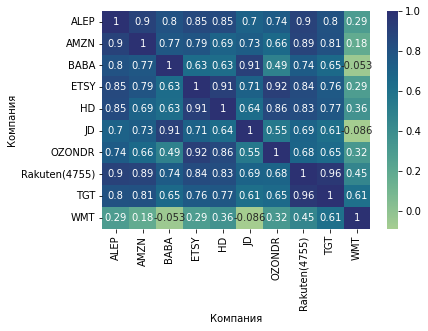

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_pivot.corr(), annot=True, cmap= "crest")